In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

from rpi_weather_display.providers import owmWeather
import rpi_weather_display

# Auto reload
%load_ext autoreload
%autoreload 2

# Set DPI
plt.rcParams['figure.dpi'] = 72

In [2]:
forecast = owmWeather(lat=52.494117, long=13.422371, api_key=os.environ["OWM_API_KEY"])
background_color = 230

## Current weather

In [3]:
c_text = rpi_weather_display.create_current_text(forecast.get_current_weather())

In [4]:
print(c_text)

Temperature: 6.7
Temperature feels like: -0.4
Description: broken clouds
Rain: 0
Last update: 20:43


In [5]:
c_image = rpi_weather_display.create_current_image(c_text, color=background_color)

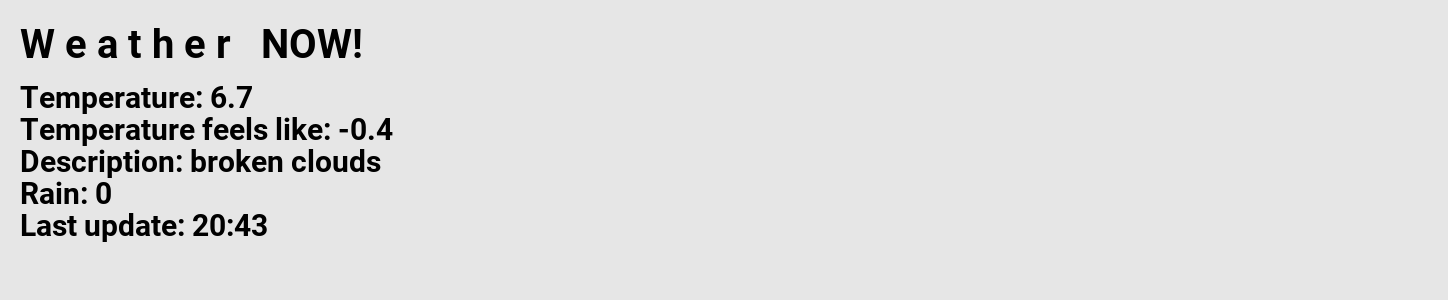

In [6]:
c_image

## Hourly plot

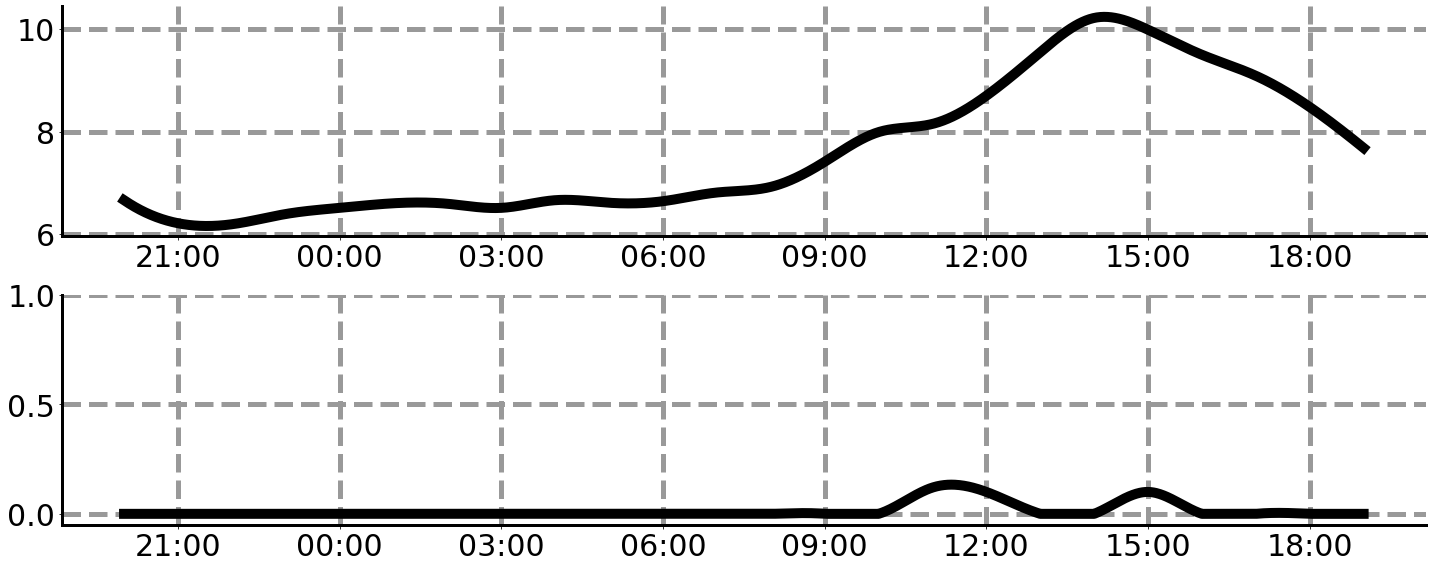

In [7]:
h_plot = rpi_weather_display.create_hourly_plot(forecast.get_hourly_data())

## Daily weather plot

In [8]:
d_text = rpi_weather_display.create_daily_text(forecast.get_daily_data())

In [9]:
print(d_text[0])

Today
Low: 2.3
High: 6.66
Rain: 0.1


In [10]:
d_image = rpi_weather_display.create_daily_image(
    daily_text=d_text,
    color=background_color,
)

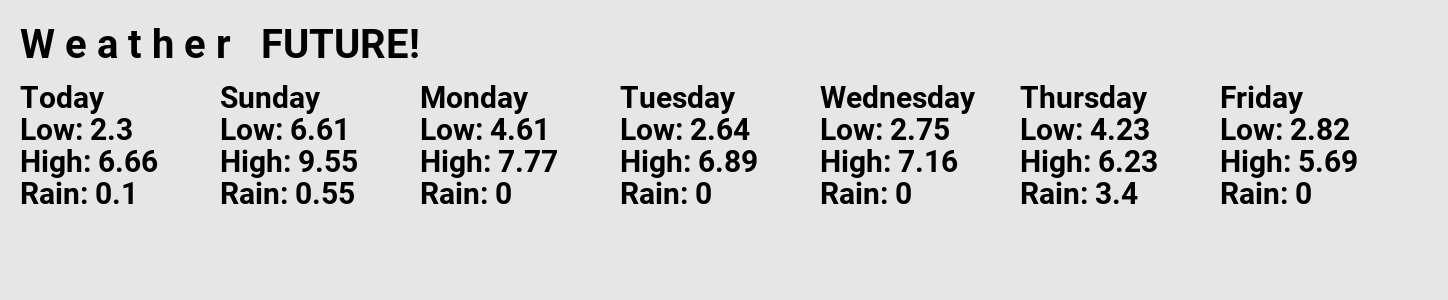

In [11]:
d_image

# Full display image

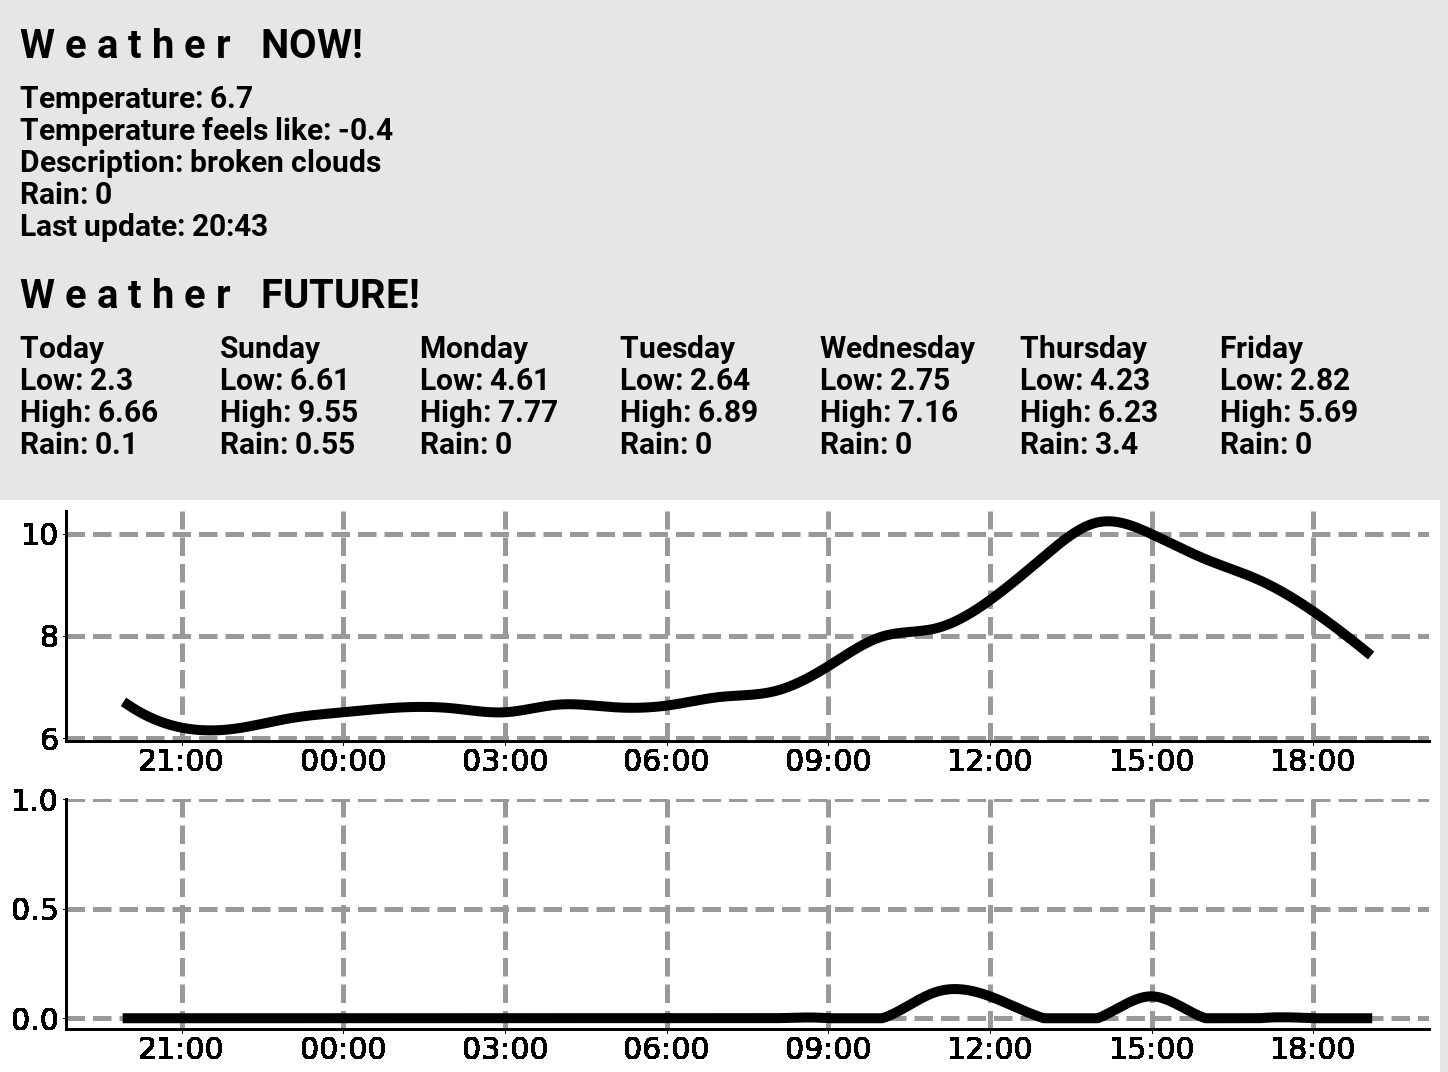

In [12]:
rpi_weather_display.create_forecast_image(
    hourly=rpi_weather_display.convert_plt_fig_to_pil(h_plot),
    daily=d_image,
    current=c_image,
    color=background_color,
)